# Week 2
__Dates__: March 6-13, 2018

__Authors__: Alex Nakagawa and Jemima Shi

This week, we tried tackling the alignment of all of the sequences 

In [8]:
import numpy as np
import pandas as pd
import re
import Bio
from Bio import SeqIO
from glob import glob
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import seaborn as sns
import matplotlib.pyplot as plt

DATA_DIR = '../data/raw/3.24_species_only/' # Just the 24 species only

In [26]:
# Reads through and saves the names of all files found in the data directory.
files = glob(DATA_DIR + '*.fa')
files[:5]

['../data/raw/3.24_species_only/outlier_rm_with_length_VT19294.fa',
 '../data/raw/3.24_species_only/outlier_rm_with_length_VT17017.fa',
 '../data/raw/3.24_species_only/outlier_rm_with_length_VT61919.fa',
 '../data/raw/3.24_species_only/outlier_rm_with_length_VT8170.fa',
 '../data/raw/3.24_species_only/outlier_rm_with_length_VT22207.fa']

In [10]:
def read_file(file_name):
    """
    file_name: the name of a file within the directory
    
    Returns all the records from a single fasta file as a list.
    """
    records = []
    for record in SeqIO.parse(file_name, "fasta"):
        records.append(record)
    return records
records = read_file(files[0])

In [11]:
def C_count(sequence):
    """
    sequence: a sequence of A, C, T, G as a string
    
    Returns the number of "C's" within the sequence
    """
    return len(re.findall(r"C", str(sequence)))


def G_count(sequence):
    """
    sequence: a sequence of A, C, T, G as a string
    
    Returns the number of "G's" within the sequence
    """
    return len(re.findall(r"G", str(sequence)))

In [12]:
#Takes each species in a fasta file and extracts the Description & Sequence into a pandas df.

values = [[record.seq, record.description] for record in records]
sequences = pd.DataFrame(values)
sequences.rename(columns={0 : 'Sequence', 1: 'Description'}, inplace=True)
sequences.set_index('Description', inplace=True)

#appends a column containing the counts of the letters C & G and appends the length of each sequence.

sequences["C Count"] = sequences["Sequence"].apply(lambda x: C_count(x))
sequences["G Count"] = sequences["Sequence"].apply(lambda x: G_count(x))
sequences["Length"] = sequences["Sequence"].apply(lambda x: len(x))

#computes the ratio of CG in relationship to the record's sequence.

sequences["CG Ratio"] = (sequences["C Count"] + sequences["G Count"]) / sequences["Length"]
sequences

,Sequence,C Count,G Count,Length,CG Ratio
Description,,,,,
VT19294|0|MEMB002D|-|2520,"(A, A, G, A, C, A, G, A, C, A, G, C, A, C, T, ...",650,541,2520,0.472619
VT19294|0|MEMB002F|-|2326,"(A, A, G, A, C, A, G, A, C, A, G, C, T, G, A, ...",616,518,2326,0.487532
VT19294|0|MEMB003A|-|2500,"(A, A, G, A, C, A, G, A, C, A, G, C, A, C, T, ...",639,545,2500,0.473600
VT19294|0|MEMB003B|-|2281,"(A, A, G, A, C, A, G, A, C, A, G, C, A, C, T, ...",612,509,2281,0.491451
VT19294|0|MEMB003D|-|2484,"(A, A, G, A, C, A, G, A, C, A, G, C, A, C, T, ...",668,553,2484,0.491546
VT19294|0|MEMB004B|-|2174,"(A, A, G, A, C, A, G, A, C, A, G, C, A, C, T, ...",620,507,2174,0.518399
VT19294|0|MEMB004E|-|2236,"(A, A, G, A, C, A, G, A, C, A, G, C, A, C, T, ...",625,529,2236,0.516100
VT19294|0|MEMB005D|-|2259,"(A, A, G, A, C, A, G, A, C, A, G, C, A, C, T, ...",602,478,2259,0.478088
VT19294|0|MEMB007B|-|2349,"(A, A, G, A, C, A, G, A, C, A, G, C, T, G, A, ...",654,555,2349,0.514687


In [13]:

def matches(sequence1, sequence2):
    """
    sequence1: the sequence of the species chosen 
    sequence2: a sequence of another species within the table
    
    Returns a string with the first sequence, second sequence, matching symbol '-', and final matched score.
    """
    alignments = pairwise2.align.globalxx(str(sequence1), str(sequence2))
    x = format_alignment(*alignments[0])
    return x


In [14]:

def take_first_sequence(matched_sequence):
    """
    matched_sequence: the output from the matches fn
    
    Returns the first sequence outputted from matches that has now been matched with another sequence.
    """
    splits = re.split(r'\s+', matched_sequence)
    return list(splits[0])

In [15]:

def take_second_sequence(matched_sequence):
    """
    matched_sequence: the output from the matches fn
    
    Returns the second sequence outputted from matches that has now been matched with a base sequence.
    """
    splits = re.split(r'\s+', matched_sequence)
    return list(splits[2])

In [16]:

def chosen_base_sequence(base_sequence_index, table):
    """
    base_sequence_index: the index of a species to compare with others in the table
    table: the df holding the sequences of the chosen species and others of the same file
    
    Returns a df with the rows indicating the 'base_index'_'index in comparison' while columns 
    indicate the index of a genome within the sequence and a column with the matching score from pairwise2.
    
    """
    other_sequences = list(np.arange(table.shape[0]))
    temp = matches(table["Sequence"][base_sequence_index], table["Sequence"][other_sequences[0]])
    first_comparison = take_first_sequence(temp)
    
    scores = []
    
    final = pd.DataFrame(take_second_sequence(temp)).reset_index()
    final = final.rename(columns={0: "{}_{}".format(base_sequence_index, other_sequences[0])})
    
    if base_sequence_index == 0:
        scores += [table["Length"][0]]   
    else:
        scores = scores + re.findall(r'[0-9]+', temp)
    
    base = str(table.iloc[base_sequence_index, 0])
    for x in other_sequences[1:]:
        matched = matches(base, str(table.iloc[x, 0]))
        to_add = pd.DataFrame(take_second_sequence(matched))
        scores = scores + re.findall(r'[0-9]+', matched)
        final = final.merge(to_add.reset_index(), on= "index", how= 'outer')
        final = final.rename(columns={0: "{}_{}".format(base_sequence_index, x)})
        
    final.drop("index", 1, inplace=True)
    final_transpose = final.transpose()
    final_transpose["Score"] = scores
    return final_transpose

In [17]:
def rename(table, sequence_index):
    """
    table: the df that holds all the species extracted from the raw data
    sequence_index: the index of the specimen of interest
    
    Returns a list with all the possible combinations for the chosen species with others in the same file
    """
    reset = table.reset_index()
    current_species = str(reset["Description"][sequence_index])
    current = [current_species]*sequences.shape[0]
    other_species = reset["Description"]
    return ["{} with {}".format(name1, name2) for name1, name2 in zip(current, other_species)]

In [18]:
x = chosen_base_sequence(0, sequences)

In [19]:
x

,0,1,2,3,4,5,6,7,8,9,...,2945,2946,2947,2948,2949,2950,2951,2952,2953,Score
0_0,A,A,G,A,C,A,G,A,C,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520
0_1,A,A,G,A,C,A,G,A,C,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919
0_2,A,A,G,A,C,A,G,A,C,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2125
0_3,A,A,G,A,C,A,G,A,C,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003
0_4,A,A,G,A,C,A,G,A,C,A,...,T,-,C,A,G,C,C,A,A,2050
0_5,A,A,G,A,C,A,G,A,C,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1870
0_6,A,A,G,A,C,A,G,A,C,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025
0_7,A,A,G,A,C,A,G,A,C,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
0_8,A,A,G,A,C,A,G,A,C,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1949
0_9,A,A,G,A,C,A,G,A,C,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997


In [20]:
#changed the index from [base_index to current_index] to descriptions of the species 
#CHANGE TO SPECIES NAME LATER-- EVENTUALLY--
#sequences.reset_index()['Description'].str.findall('MEMB(....)')

pd.set_option('display.max_columns', 3160)

temps = x.copy()
temps = temps.reset_index()
temps["index"] = rename(sequences, 0)
temps

index  0  1  2  3  4  5  6  7  \
0   VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
1   VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
2   VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
3   VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
4   VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
5   VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
6   VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
7   VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
8   VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
9   VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
10  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
11  VT19294|0|MEMB002D|-|2520 with VT19294|0|dkik|...  A  A  G  A  C  A  G  A   
12  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
13  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
14  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
15  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
16  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
17  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
18  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
19  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
20  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
21  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
22  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  A  A  G  A  C  A  G  A   
23  VT19294|0|MEMB002D|-|2520 with VT19294|0|MEMB0...  -  -  a  a  g  a  c  a   

    8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32  \
0   C  A  G  C  A  C  T  G  C  T  A  A  C  A  G  A  G  A  A  A  C  C  C  C  T   
1   C  A  G  C  T  G  A  C  A  G  C  A  C  T  G  C  T  A  A  C  A  G  A  G  A   
2   C  A  G  C  A  C  T  G  C  -  G  A  A  C  A  G  A  G  A  A  A  C  C  C  C   
3   C  A  G  C  A  C  T  G  C  T  A  A  A  A  A  A  A  A  G  A  A  C  A  G  A   
4   C  A  G  C  A  C  T  G  C  -  G  A  A  C  A  G  A  G  A  A  A  C  C  C  C   
5   C  A  G  C  A  C  T  G  C  T  -  C  A  C  A  G  A  G  A  A  A  C  C  C  C   
6   C  A  G  C  A  C  T  G  C  T  -  A  G  C  A  G  A  G  A  A  A  C  C  C  C   
7   C  A  G  C  A  C  T  G  C  T  A  A  C  A  G  A  G  A  A  A  C  C  T  T  A   
8   C  A  G  C  T  G  A  C  A  G  C  A  C  T  G  C  T  -  C  A  C  A  G  A  G   
9   C  A  G  C  A  C  T  G  C  T  A  A  A  A  A  C  A  C  T  G  A  G  A  A  A   
10  C  A  G  C  A  C  T  G  C  T  -  T  A  C  A  G  A  G  A  A  A  C  C  C  C   
11  C  A  G  C  A  C  T  G  C  -  G  A  A  C  A  G  A  G  A  A  A  C  C  C  C   
12  C  A  G  C  T  G  A  C  A  G  C  A  C  T  G  C  T  -  C  A  C  A  G  A  G   
13  C  A  G  C  T  G  A  C  A  G  C  A  C  T  G  C  T  -  C  A  C  A  G  A  G   
14  C  A  G  C  T  G  A  C  A  G  C  A  C  T  G  C  T  -  C  A  C  A  G  A  G   
15  C  C  A  G  C  A  C  T  G  C  T  A  A  C  A  G  A  G  A  A  A  C  C  T  A   
16  C  A  G  C  T  G  A  C  A  G  C  A  C  T  G  C  T  -  -  C  A  G  A  G  A   
17  C  A  G  C  A  C  T  G  C  T  -  A  G  C  A  G  A  G  A  A  A  C  C  C  C   
18  C  A  G  C  T  G  A  C  A  G  C  A  C  T  G  C  T  -  C  A  C  A  G  A  G   
19  C  A  G  C  A  C  T  G  C  T  -  T  A  C  A  G  A  G  A  A  A  C  C  C  C   
20  C  A  G  C  A  C  T  G  C  T  A  A  C  A  G  A  G  A  A  A  C  C  T  T  A   
21  C  A  G  A  T  C  A  C  T  G  C  G  C  T  A  A  C  A  G  A  G  A  A  A  -   
22  C  A  G  C  A  C  T  G  C  T  A  A  C  A  G  A  G  A  A  A  C  C  C  C  T   
23  G  A  C  A  G  C  T  G  A  C  A  G  C  A  C  T  G  C  T  A  A  C  A  G  A 

In [21]:
def score_ratio(sequence_table, matched_table, sequence_index):
    """
    sequence_table: the df containing the decscription and information about the individual sequences.
    matched_table: the df with one sequence matched against all others in the file. 
    sequence_index: the index of the 
    """
    current_len = sequence_table["Length"][sequence_index]
    curr_array = list(np.ones(sequence_table.shape[0])*current_len)
    larger_len = np.array([max(int(len1), int(len2)) for len1, len2 in zip(curr_array, sequence_table["Length"])])
    scores = np.array([int(score) for score in matched_table["Score"]])
    return scores / larger_len

In [23]:
ratios = score_ratio(sequences, x, 0)
temps["score_ratio"] = ratios

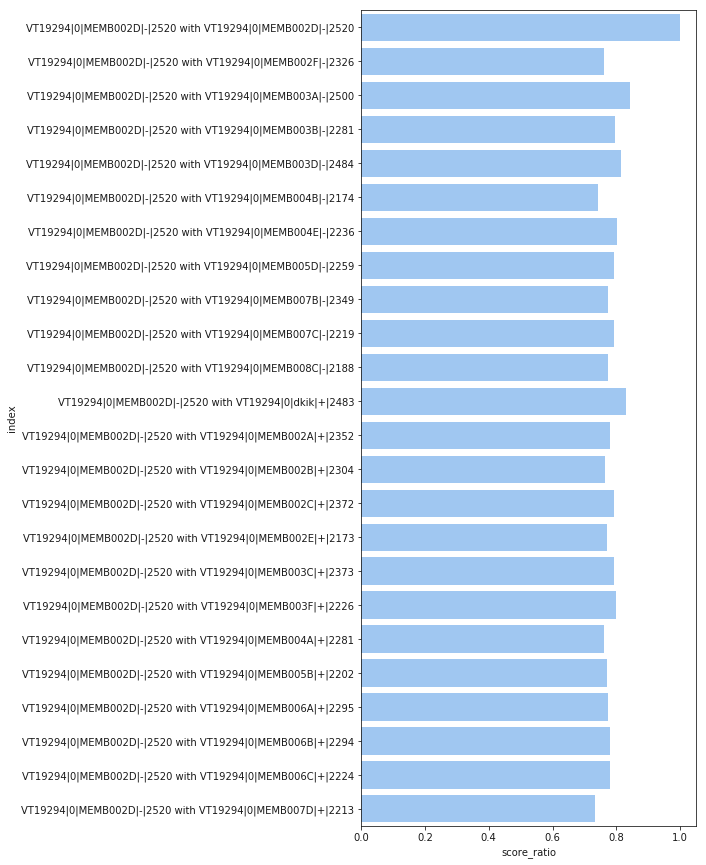

In [25]:
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x= "score_ratio", y= "index", data= temps, color='b');